***The data I am using was collected to provide context to the ongoing argument that AirBnB is affecting housing in various cities. Specifically, I am using data that was collected for the city of San Francisco for various months in various years.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import t

In [2]:
cd DataSciData/

/Users/shiva/Downloads/DataSciData


***Below, I am importing the final combined dataset that I put together in the other notebook***

In [3]:
data = pd.read_csv('Final-Data.csv')

In [4]:
del data['Unnamed: 0']
data

,id,latitude,longitude,price,monthly_price,minimum_nights,maximum_nights,neighbourhood_cleansed,property_type,room_type,license,year,month,comparable_price
0,295240.0,37.762674,-122.439195,250.0,5000.0,2.0,365.0,Castro/Upper Market,House,Entire home/apt,NaN,2015,may,3697
1,4882829.0,37.778993,-122.462111,89.0,NaN,2.0,1125.0,Inner Richmond,Apartment,Private room,NaN,2015,may,3697
2,4850420.0,37.771447,-122.414782,164.0,NaN,1.0,1125.0,South of Market,Apartment,Private room,NaN,2015,may,3697
3,1278848.0,37.790745,-122.415334,170.0,NaN,2.0,365.0,Nob Hill,Apartment,Entire home/apt,NaN,2015,may,3697
4,5068275.0,37.759449,-122.389447,185.0,NaN,2.0,29.0,Potrero Hill,Apartment,Entire home/apt,NaN,2015,may,3697
5,2315086.0,37.787572,-122.444948,135.0,3540.0,3.0,1125.0,Pacific Heights,Apartment,Private room,STR-0000107,2015,may,3697
6,4839456.0,37.780413,-122.406470,70.0,1500.0,3.0,1125.0,South of Market,Loft,Shared room,NaN,2015,may,3697
7,3726164.0,37.792592,-122.421331,125.0,2500.0,15.0,38.0,Nob Hill,Apartment,Entire home/apt,NaN,2015,may,3697
8,4258257.0,37.791648,-122.413633,140.0,NaN,3.0,1125.0,Nob Hill,Apartment,Entire home/apt,NaN,2015,may,3697
9,4045632.0,37.794952,-122.412198,69.0,NaN,1.0,21.0,Nob Hill,Apartment,Private room,NaN,2015,may,3697


***Below, I begin my analysis looking at listings in SF for the month of May 2019***

In [5]:
data2019May = data[(data['month'] == "may") & (data['year'] == 2019)]

In [6]:
percentCounts = data2019May['neighbourhood_cleansed'].value_counts()
percentCounts/len(data2019May)

Mission                  0.094111
Downtown/Civic Center    0.083775
Western Addition         0.081735
South of Market          0.080239
Castro/Upper Market      0.057392
Bernal Heights           0.052768
Haight Ashbury           0.047328
Noe Valley               0.043928
Outer Sunset             0.036992
Nob Hill                 0.030600
Potrero Hill             0.030192
Inner Richmond           0.025024
Marina                   0.024752
Russian Hill             0.024480
Bayview                  0.022984
Excelsior                0.022168
Pacific Heights          0.021760
North Beach              0.021488
Inner Sunset             0.021080
Outer Richmond           0.020944
Financial District       0.020944
Outer Mission            0.020944
Parkside                 0.017408
West of Twin Peaks       0.016728
Chinatown                0.015640
Ocean View               0.012920
Glen Park                0.009656
Visitacion Valley        0.009384
Twin Peaks               0.008704
Lakeshore     

***Above, I have looked at the neighorhood each listing is in, and found the total percentage each listing makes of all the listings available for the month of May 2019***

***Below, looking at the price of AirBnB listings***

In [7]:
data2019May['price'].value_counts()

150.0     281
100.0     223
200.0     198
250.0     188
125.0     156
120.0     133
300.0     130
99.0      123
140.0     121
110.0     117
199.0     111
175.0     110
90.0      109
75.0      108
350.0     108
80.0      104
95.0       96
130.0      84
225.0      83
180.0      83
135.0      82
79.0       82
160.0      80
85.0       79
400.0      68
115.0      67
450.0      66
145.0      65
50.0       65
65.0       62
         ... 
554.0       1
459.0       1
505.0       1
2565.0      1
635.0       1
332.0       1
266.0       1
859.0       1
308.0       1
589.0       1
695.0       1
2282.0      1
462.0       1
795.0       1
625.0       1
447.0       1
3050.0      1
3800.0      1
473.0       1
263.0       1
2281.0      1
4000.0      1
291.0       1
253.0       1
478.0       1
520.0       1
645.0       1
587.0       1
487.0       1
328.0       1
Name: price, Length: 492, dtype: int64

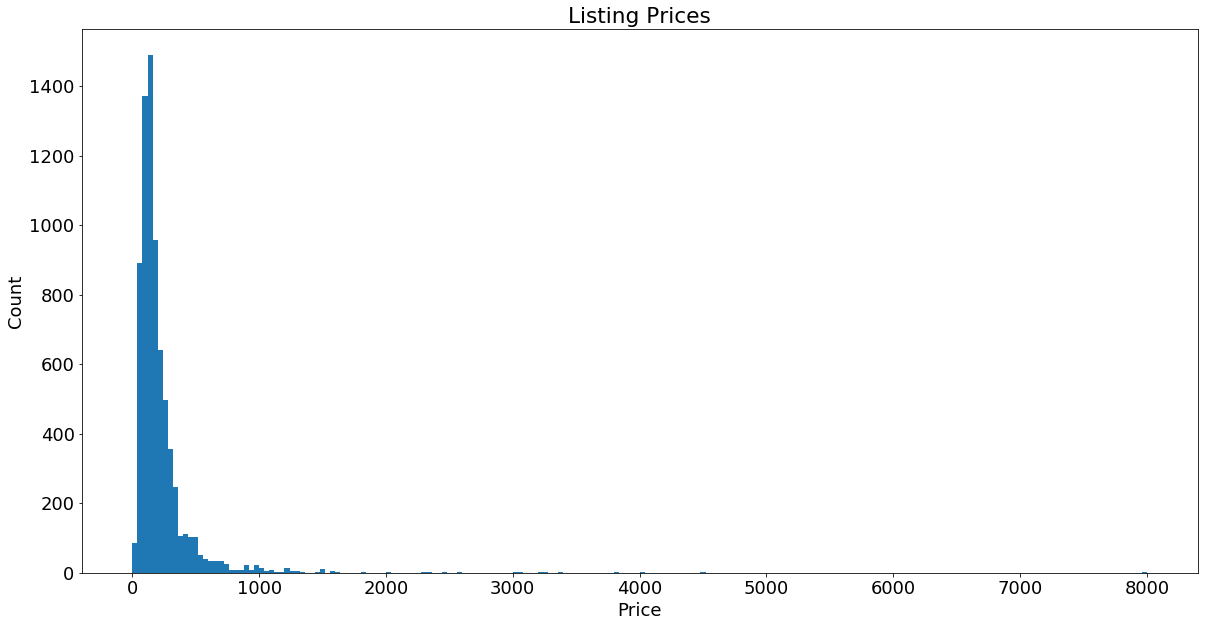

In [8]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(20,10))
plt.hist(data2019May['price'],bins=200)
plt.title("Listing Prices")
plt.xlabel('Price')
plt.ylabel("Count")
plt.show()

***Above, looking at the histogram for the price of the listings in the month of March 2019, it appears there are a few highly priced properties to the very far right of the spectrum.***

***Below, recreating this plot without these higher priced listings***

In [9]:
highPriced = data2019May[data2019May['price'] > 2000]
highPriced['price'].value_counts()

2353.0    2
4500.0    2
8000.0    2
3000.0    2
3800.0    1
2282.0    1
2010.0    1
3050.0    1
2450.0    1
4000.0    1
3394.0    1
3250.0    1
3200.0    1
2565.0    1
2281.0    1
Name: price, dtype: int64

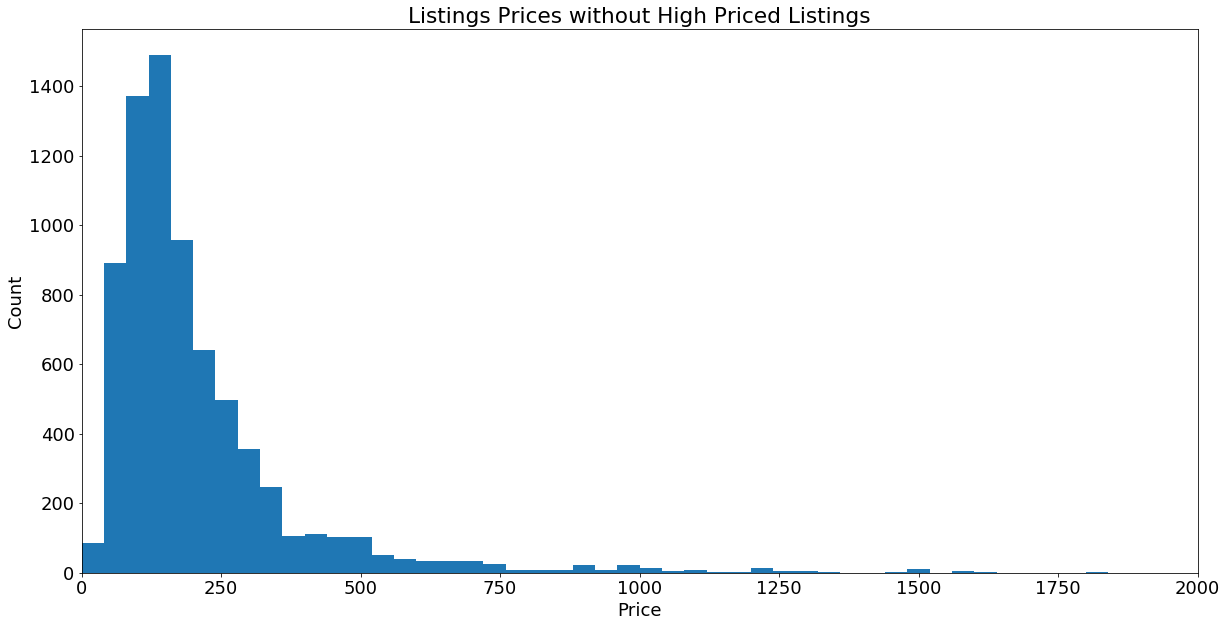

In [10]:
plt.figure(figsize=(20,10))
plt.hist(data2019May['price'],bins=200)
plt.xlim(0,2000)

plt.title("Listings Prices without High Priced Listings")
plt.xlabel('Price')
plt.ylabel("Count")
plt.show()

In [11]:
mean = data2019May['price'].mean()
stdDev = data2019May['price'].std()
meanWithoutHighPriced = data2019May[data2019May['price'] <= 2000]['price'].mean()
stdDevWithoutHighPriced =  data2019May[data2019May['price'] <= 2000]['price'].std()
print("Average price of all listings: " + "$" + str(mean))
print("Standard deviation in price of all listings: " + "$" + str(stdDev))
print("Average price of listings disregarding high priced listings: " + "$" + str(meanWithoutHighPriced))
print("Standard deviation in price of listings disregarding high priced listings: " + "$" + str(stdDevWithoutHighPriced))

Average price of all listings: $215.96450428396574
Standard deviation in price of all listings: $265.6527621952593
Average price of listings disregarding high priced listings: $207.2537496591219
Standard deviation in price of listings disregarding high priced listings: $184.67630054818977


***The above histogram disregards these high priced properties for viewing purposes. As shown, the mean price of listings is around 207 dollars a night if we don't include the higher priced listings. Including the higher priced listings brings this up to about 216 dollars as some of those properties are really expensive (two are 8,000 a night). However, the majority of listings are far lower in the price, and this help reduced the effect of those outliers.***

***That being said, the standard deviation for price of listings was about 266 dollars including the high priced listings, and only 185 dollars without. Again, including the high priced listings significantly affects this number due to the huge difference between the price of the majority of listings and the expensive ones.***

In [12]:
data2019May.describe()

,id,latitude,longitude,price,monthly_price,minimum_nights,maximum_nights,year,comparable_price
count,7.353000e+03,7353.000000,7353.000000,7353.000000,1110.000000,7.353000e+03,7.353000e+03,7353.0,7353.0
mean,1.749404e+07,37.766109,-122.430213,215.964504,4332.118919,1.361586e+04,1.413535e+04,2019.0,0.0
std,1.089128e+07,0.022591,0.026747,265.652762,2809.691390,1.166186e+06,1.166180e+06,0.0,0.0
min,9.580000e+02,37.704360,-122.513060,0.000000,700.000000,1.000000e+00,1.000000e+00,2019.0,0.0
25%,7.329639e+06,37.751250,-122.442590,100.000000,2505.000000,2.000000e+00,2.900000e+01,2019.0,0.0
50%,1.878758e+07,37.768090,-122.425030,150.000000,3750.000000,4.000000e+00,1.800000e+02,2019.0,0.0
75%,2.733656e+07,37.785470,-122.410820,249.000000,5200.000000,3.000000e+01,1.125000e+03,2019.0,0.0
max,3.437132e+07,37.810310,-122.368570,8000.000000,25000.000000,1.000000e+08,1.000000e+08,2019.0,0.0


***Above are full descriptive statistics for the month of May 2019. One key issue with AirBnB I have seen thrown around by anti-AirBnB activists is that AirBnB is making homeowners move their properties from the "long-term" housing market to the "short-term" housing market. This reduces the number of properties available for people to rent out long-term so they can acutally live in a city, and following supply-and-demand drives the prices up. From the data it seems that there are very few listings that require a substantially large minimum night stay. Although, the 30 minimum night stay properties might also be geared toward longer-term rentals, it seems that a good amount of listings are made to accomodate shorter-term listings***

***Below, looking at prices for these listings***

In [13]:
x = data2019May['monthly_price'].dropna()
print("Percent of listings with monthly price quoted: " + str(len(x)/len(data2019May['monthly_price'])))

Percent of listings with monthly price quoted: 0.15095879232966136


***Above, it seems very few listings actually even have a monthly price quoted***

Text(0.5, 1.0, 'Nightly Prices vs Monthly Prices Prorated')

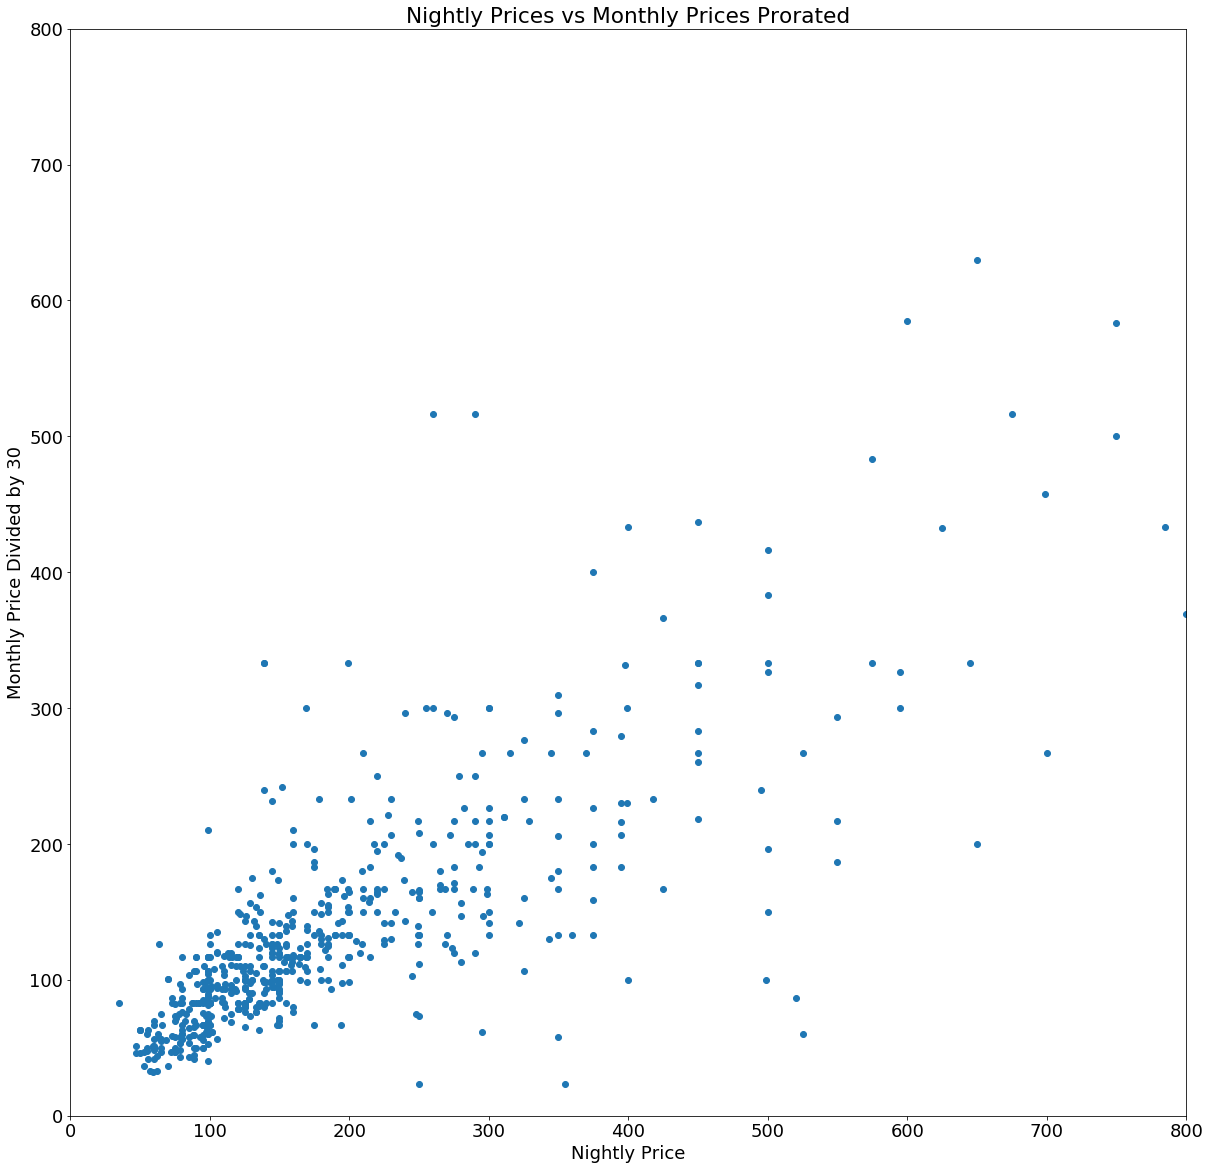

In [14]:
plt.figure(figsize = (20,20))
x = data2019May.dropna()
plt.scatter(x['price'],x['monthly_price']/30)
plt.xlim(0,800)
plt.ylim(0,800)
plt.xlabel('Nightly Price')
plt.ylabel("Monthly Price Divided by 30")
plt.title("Nightly Prices vs Monthly Prices Prorated")

***The graph above was an attempt to see if home owners on AirBnB are pricing their properties at a lower price per night when booked by the month (long-term stays) versus when booked by the night (short-term stays). It's reasonable to assume that homeowners would discount monthly stays a bit to incentivize longer-term rentals.***

In [15]:
x = data2019May.dropna()
beatIt = 0
for i in x['price'].keys():
    if x['price'][i] > ((x['monthly_price'][i]/30) + 0):
        beatIt += 1
print("Percent of listings with a nightly price greater \nthan the prorated monthly cost: " + "\n" + str(beatIt/len(x)))
beatIt = 0
for i in x['price'].keys():
    if x['price'][i] >= ((x['monthly_price'][i]/30) + 10):
        beatIt += 1
print("\nPercent of listings with a nightly price 10 dolllars or greater \nthan the prorated monthly cost: " + "\n" + str(beatIt/len(x)))

Percent of listings with a nightly price greater 
than the prorated monthly cost: 
0.8273615635179153

Percent of listings with a nightly price 10 dolllars or greater 
than the prorated monthly cost: 
0.747557003257329


***Looking at a scatter plot comparing the price to the prorated monthly price, it appears that several listings do indeed cost less per night when rented by the month. Specifically, 82.74% of the listings have a greater nightly price than the prorated monthly cost; however, only 74.76% of all the listings have a nightly price that is 10 dollars greater or more than the prorated monthly price. With that in mind, it seems that property owners do partially subsidize longer stays at their properties. However, it is important to note that very few Airbnb listings even have a monthly price listed alongside the nightly price; only 15.1% of listings had a monthly price quoted. This would support an assumption that Airbnb owners prefer to rent out in the short-term (less than a month) rather than the long-term.*** 

***Now, I'm taking a look at the maximum night stay requirements for these listings***

In [16]:
outliers = data2019May.loc[ data2019May['maximum_nights'] > 1200]
outliers['maximum_nights'].value_counts()

1825.0         5
10000.0        3
100000000.0    1
9999.0         1
2000.0         1
100000.0       1
3000.0         1
7300.0         1
Name: maximum_nights, dtype: int64

***Looking at the number of listings with a maximum nights limit over 1125, there are less than 20 listings out of the several thousand listings on AirBnB in May 2019 with such a high maximum nights limit. Most home owners seem to use a maximum of 1125 nights instead. As such, I figure it's better to just cut these outliers out.***

/Users/shiva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


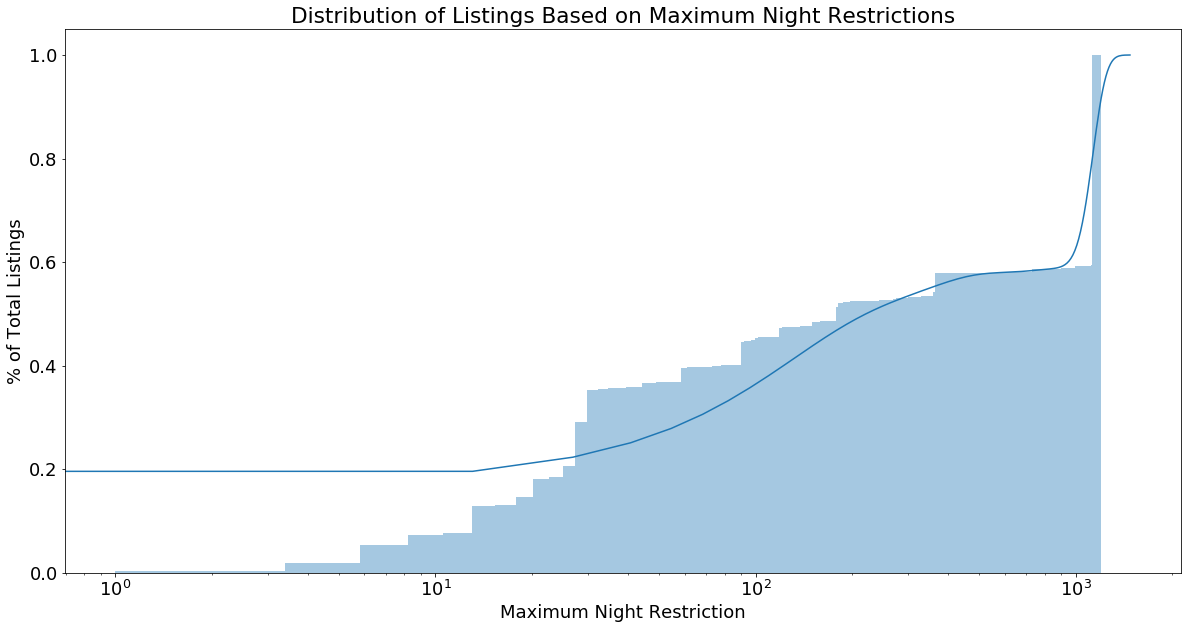

In [17]:
x = data2019May.loc [ data2019May['maximum_nights'] <= 1200]
plt.figure(figsize = (20,10))
ax = sns.distplot(x['maximum_nights'].astype(int), hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True), bins=500)
ax.set_xscale('log')
plt.xlabel('Maximum Night Restriction')
plt.ylabel("% of Total Listings")
plt.title("Distribution of Listings Based on Maximum Night Restrictions")
plt.show()

***Above, there is a steep increase in this CDF towards the end--thats due to the large number of listings with a maximum nights restriction of 1125 nights. NOTE: the x axis's scale has been set to log for improved viewing***

In [18]:
x = data2019May.loc [ data2019May['maximum_nights'] == 1125]
print("Percent of listings with a maximum night restriction of exactly 1125 nights: " + str(len(x)/len(data2019May)))
x = data2019May.loc [ data2019May['maximum_nights'] <= 30]
print("Percent of listings with a maximum night restriction of 30 nights or less: " + str(len(x)/len(data2019May)))

Percent of listings with a maximum night restriction of exactly 1125 nights: 0.39317285461716306
Percent of listings with a maximum night restriction of 30 nights or less: 0.3433972528219774


***About 34.34% of the listings have a maximum night restriction of 30 nights or less. SF law requires property owners who rent out their homes 30 nights or less a year to follow housing regulations as short-term hosts. Interestingly, there is a pretty decent chunk of people keeping people from staying more 30 nights in an Airbnb.***

***Below, I now check to see how many of these people actually have the license to engage in such a short-term rental***

In [19]:
y = data2019May[data2019May['maximum_nights'] <= 30]
print("Number of listings with a maximum night cap of 30 or less: " + str(len(y)))

Number of listings with a maximum night cap of 30 or less: 2525


In [20]:
x = y['license'].dropna()
print("Number of listings with a maximum night cap of 30 or less, with a license for short-term rentals: " + str(len(x)))

Number of listings with a maximum night cap of 30 or less, with a license for short-term rentals: 2477


In [21]:
print("Perent of listings with a maximum night cap of 30 or less \nthat have a license: " + str(len(x)/len(y)))

Perent of listings with a maximum night cap of 30 or less 
that have a license: 0.980990099009901


***It appears that 98.1% of listings do in fact have a short-term rental license, and therefore comply with SF city law regarding such rentals. However, it is important to note that in April 2017, Airbnb reached an agreement with the City of San Francisco that essentially required hosts  listing a property for less than 30 nights at a time to officially register with the city.***

***On that note, I want to look at how this percentage has changed over the year***

In [22]:
data2015May = data[(data['month'] == "may") & (data['year'] == 2015)]
data2015Nov = data[(data['month'] == "nov") & (data['year'] == 2015)]

data2016May = data[(data['month'] == "may") & (data['year'] == 2016)]
data2016Nov = data[(data['month'] == "nov") & (data['year'] == 2016)]

data2017May = data[(data['month'] == "may") & (data['year'] == 2017)]
data2017Nov = data[(data['month'] == "nov") & (data['year'] == 2017)]

data2018May = data[(data['month'] == "may") & (data['year'] == 2018)]
data2018Nov = data[(data['month'] == "nov") & (data['year'] == 2018)]

In [23]:
theYears = [data2015May, data2016May, data2017May, data2018May, data2019May]
licensePercent = []
for year in theYears:
    y = year[year['maximum_nights'] <= 30]
    x = y['license'].dropna()
    licensePercent.append(len(x)/len(y))

In [24]:
licensePercent

[0.08275493860117458,
 0.21302957633892886,
 0.17280891917002167,
 0.9742173112338858,
 0.980990099009901]

Text(0.5, 1.0, 'Perent of Listings with a Maximum Night Cap of 30 or Less That Have a License ')

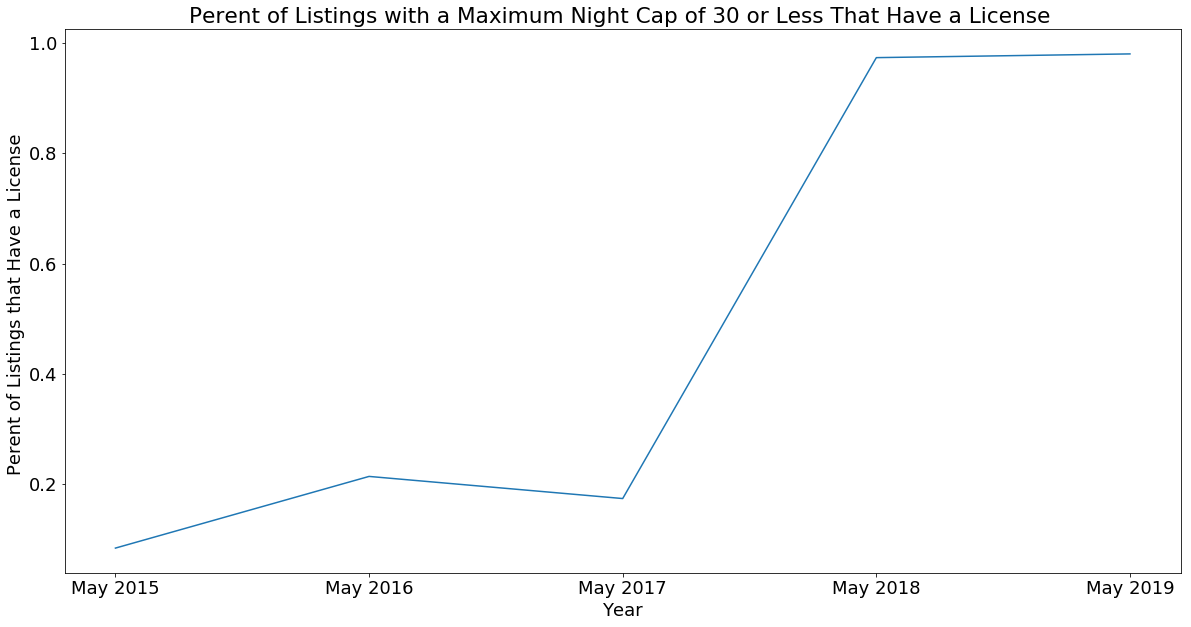

In [25]:
plt.figure(figsize=(20,10))
months = ["May 2015", "May 2016", "May 2017", "May 2018", "May 2019"]
plt.plot(months, licensePercent)
plt.xlabel('Year')
plt.ylabel('Perent of Listings that Have a License ')
plt.title('Perent of Listings with a Maximum Night Cap of 30 or Less That Have a License ')

***Recall the agreement between SF and Airbnb was reached in April 2017. Going from May 2017 to May 2018, there is a huge jump in the number of licenses. The drop from May 2016 to May 2017 may be due to hosts pulling their property off of Airbnb for not being compliant with the new rules.***

***Now, I figure it might be worth looking at minimum night requirements among the listings***

In [26]:
x = data2019May['minimum_nights'].value_counts()
x/7353

30.0           0.383381
2.0            0.201414
1.0            0.180743
3.0            0.113151
4.0            0.040528
5.0            0.024072
31.0           0.016184
7.0            0.010472
32.0           0.005032
60.0           0.004896
6.0            0.004624
90.0           0.003672
180.0          0.002584
365.0          0.000952
45.0           0.000952
14.0           0.000680
10.0           0.000544
21.0           0.000408
28.0           0.000408
183.0          0.000272
24.0           0.000272
80.0           0.000272
999.0          0.000272
360.0          0.000272
70.0           0.000272
8.0            0.000272
40.0           0.000272
18.0           0.000136
13.0           0.000136
11.0           0.000136
120.0          0.000136
270.0          0.000136
9.0            0.000136
55.0           0.000136
35.0           0.000136
140.0          0.000136
85.0           0.000136
100.0          0.000136
58.0           0.000136
17.0           0.000136
50.0           0.000136
29.0           0

In [27]:
x = data2019May[data2019May['minimum_nights'] >= 30]
print("Percent of listings that have a value for their minimum nights \nrequirement of 30 or more: " + "\n" + str(len(x)/len(data2019May)))

Percent of listings that have a value for their minimum nights 
requirement of 30 or more: 
0.42159662722698216


***Some of these listings have non-sensical minimum night requirements (100,000,000). However, the majority of listings have minimum night requirements within 365 nights, so I am going to look at those***

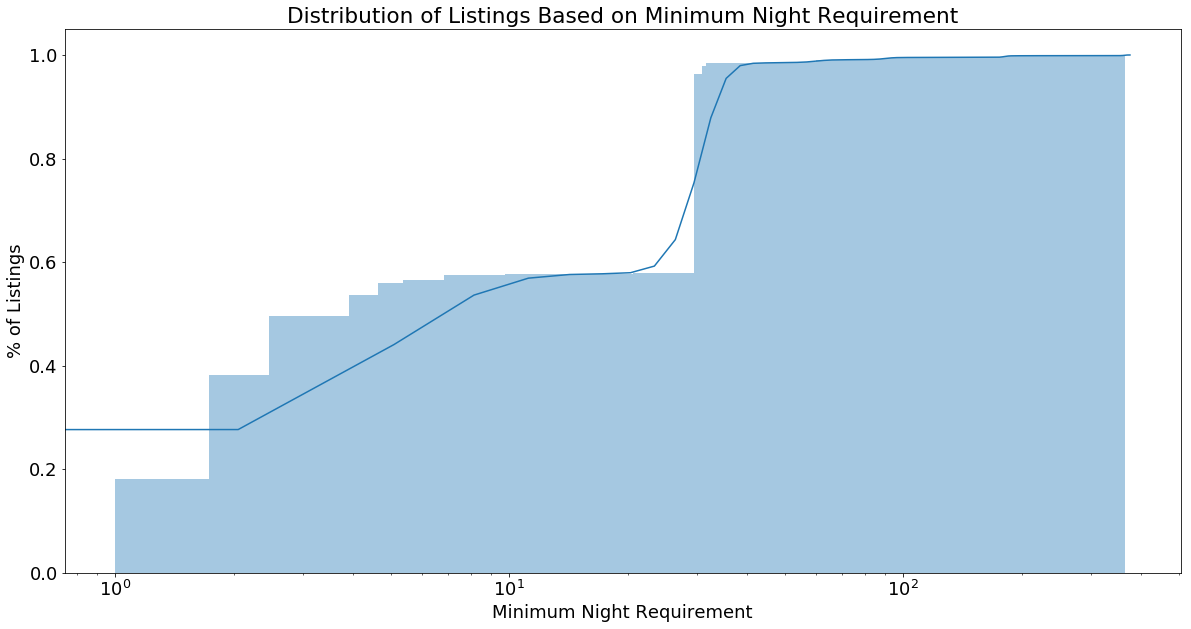

In [28]:
x = data2019May.loc [ data2019May['minimum_nights'] <= 365]
plt.figure(figsize = (20,10))
ax = sns.distplot(x['minimum_nights'].astype(int), hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True), bins=500)
ax.set_xscale('log')
plt.xlabel('Minimum Night Requirement')
plt.ylabel("% of Listings")
plt.title("Distribution of Listings Based on Minimum Night Requirement")
plt.show()

***Above, in general, a large chunk of the listings have minimum night stay requirements somewhere between 0-30 nights. This is what is shown by the steps in the left portion of the CDF. The big step in the right portion is due to the large number of properties that require a minimum night stay of 30 days (around 2500 listings). NOTE: Again, the x axis's scale has been set to log for viewing purposes***

In [29]:
print("Requirement of 30 nights or less: " + str(len(x[x['minimum_nights'] <= 30])/len(data2019May)))
print("Requirement of 30 nights: " + str(len(x[x['minimum_nights'] == 30])/len(data2019May)))

Requirement of 30 nights or less: 0.9617843057255542
Requirement of 30 nights: 0.3833809329525364


***Specifically, about 96.2% of the listings have a minimum night stay requirement of 30 nights or less. And about 38.33% have a minimum night stay requirement of 30 nights specifically. While requiring a user to stay 1-5 nights minimum doesn't seem too unreasonable, the finding that 38.33% of listings require a minimum stay of 30 nights is pretty interesting. I would assume these listings are meant for people looking to stay in the city for an extended amount of time. For example, I know a lot of people who just use AirBnB to rent out places to stay for the summer during their internships. This makes me wonder if the prices of staying in an AirBnB property for a month is significantly higher than staying in an apartment in general in the city.*** 

***Below, creating data frames for more month/year combinations from the main dataset***

In [30]:
data2015May = data[(data['month'] == "may") & (data['year'] == 2015)]
data2015Nov = data[(data['month'] == "nov") & (data['year'] == 2015)]

data2016May = data[(data['month'] == "may") & (data['year'] == 2016)]
data2016Nov = data[(data['month'] == "nov") & (data['year'] == 2016)]

In [31]:
data2017May = data[(data['month'] == "may") & (data['year'] == 2017)]
data2017Nov = data[(data['month'] == "nov") & (data['year'] == 2017)]

data2018May = data[(data['month'] == "may") & (data['year'] == 2018)]
data2018Nov = data[(data['month'] == "nov") & (data['year'] == 2018)]

***Below, creating a list of the rental prices from the main data set***

In [32]:
theMonths = [data2015May, data2015Nov, data2016May, data2016Nov, data2017May, data2017Nov, data2018May, data2018Nov]
rentalPrices = []
for i in theMonths:
    rentalPrices.append(i['comparable_price'].mean())

***I am now trying to find the price of a "monthly" stay in an Airbnb listing. I am looking at the listings with minimum nights == 30 for the best comparison. Obviously a month isn't exactly 30 days, but going by the overwhelming amount of listings that use 30 days for their minimum night requirement, I'm going to assume this is a "month"***

In [33]:
monthlyStaysRequired = data2018May[data2018May['minimum_nights'] == 30]
x = monthlyStaysRequired['monthly_price'].dropna(axis=0)

In [34]:
print("Monthly stay cost: " + str(x.mean()))
matchings = x.keys()
nightlyPrices = []
for i in matchings:
    nightlyPrices.append(data2018May['price'][i])
pricePerMonthALaCarte = pd.DataFrame(nightlyPrices)
print("Nightly stay for 30 days cost: " + str(pricePerMonthALaCarte.mean()[0]*30))

Monthly stay cost: 4240.664359861592
Nightly stay for 30 days cost: 5834.01384083045


***Above are two prices: the former is the average price for staying an entire month, while the latter is the average cost per night for those same propeties multiplied by 30 as these listings require you to stay for at least 30 days. Straight away, the price for staying a month in an AirBnB seems more expensive in general compared to regular rentals in SF. That aside, there is also a significant difference in the cost of paying nightly and paying for an entire month instead (5834 dollars vs 4240 dollars) ***

***Now, I want to look at the way the number of short-term listings compared to long-term listings has changed over time along with the average price of rentals in SF***

In [35]:
maximumNightPerYear = []
for i in theMonths:
    hold = i
    hold = hold[hold['property_type'] == 'Apartment']
    shortTermListings = hold[hold['minimum_nights'] < 30]
    longTermListings = hold[hold['minimum_nights'] >= 30]
    totalListings = len(shortTermListings) + len(longTermListings)
    #maximumNightPerYear.append((len(shortTermListings)/len(longTermListings)))
    maximumNightPerYear.append((len(shortTermListings)))

***Above, I define a "long-term listing" as one that that requires someone to stay 30 nights or more***

***NOTE: The following plot was created with lots of reference to: https://matplotlib.org/gallery/api/two_scales.html***

<Figure size 1440x720 with 0 Axes>

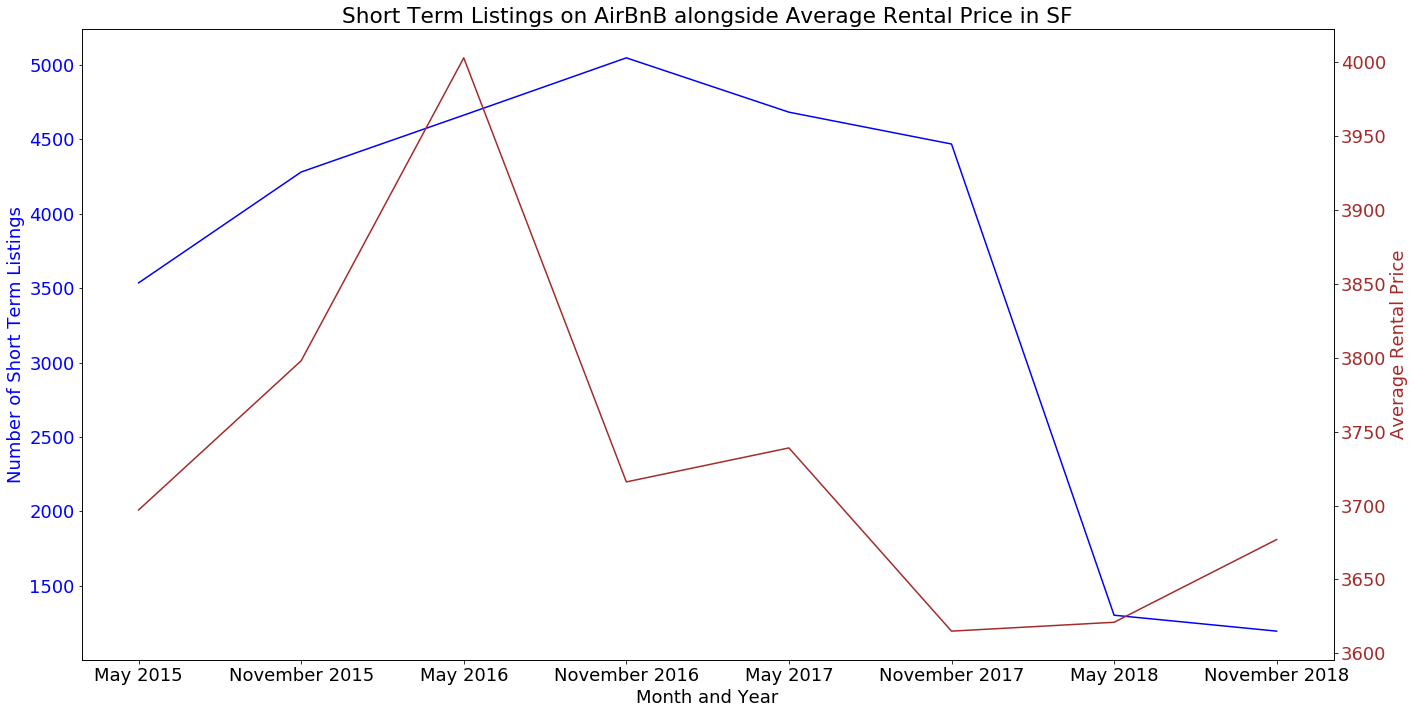

In [36]:
months = ["May 2015", "November 2015", "May 2016", "November 2016","May 2017", "November 2017", "May 2018", "November 2018"]

plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.plot(months, maximumNightPerYear, color='blue')
ax1.set_xlabel('Month and Year')
ax1.set_ylabel('Number of Short Term Listings', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  

ax2.plot(months, rentalPrices, color='brown')
ax2.set_ylabel('Average Rental Price', color='brown')  
ax2.tick_params(axis='y', labelcolor='brown')

fig.tight_layout()  
plt.title("Short Term Listings on AirBnB alongside Average Rental Price in SF")
plt.xticks(rotation = 20)
plt.show()

***From this plot, it seems that there no is strong relationship between the number of short-term listings and the average rental price in SF. Although, in the right portion of the chart, it seems that both decrease downward together.***

***On that note, I figure it is worth looking at correlations between maximum and minimum night variable values and the price of a listing***

In [37]:
data2017Jan = data[(data['month'] == "jan") & (data['year'] == 2017)]
data2017Feb = data[(data['month'] == "feb") & (data['year'] == 2017)]
data2017Mar = data[(data['month'] == "mar") & (data['year'] == 2017)]
data2017Apr = data[(data['month'] == "apr") & (data['year'] == 2017)]
data2017Jun = data[(data['month'] == "jun") & (data['year'] == 2017)]
data2017Jul = data[(data['month'] == "jul") & (data['year'] == 2017)]
data2017Aug = data[(data['month'] == "aug") & (data['year'] == 2017)]
data2017Sep = data[(data['month'] == "sep") & (data['year'] == 2017)]
data2017Oct = data[(data['month'] == "oct") & (data['year'] == 2017)]
data2017Dec = data[(data['month'] == "dec") & (data['year'] == 2017)]

In [38]:
model = LinearRegression().fit(data2017Jan[["minimum_nights"]],data2017Jan[["price"]])
print(model.intercept_,model.coef_)

[247.93612009] [[-0.17433633]]


***Seems that as the number of minimum nights increases, the price of a listings goes down very very slightly. However, that drop in price is pretty insignificant*** 

In [39]:
model = LinearRegression().fit(data2017Jan[["maximum_nights"]],data2017Jan[["price"]])
print(model.intercept_,model.coef_)

[247.23523851] [[-1.50316647e-08]]


***Same situation for maximum nights***

In [40]:
x = data2017Jan.dropna()
model = LinearRegression().fit(x[["maximum_nights"]],x[["monthly_price"]])
print(model.intercept_,model.coef_)

[4352.66863079] [[-0.049489]]


***Seems that as the maximum nights restriction goes up, the monthly price goes down very very slightly. Again, considering monthly costs are around 4000 dollars, this coefficient doesn't seem too significant***

In [41]:
x = data2017Jan.dropna()
model = LinearRegression().fit(x[["minimum_nights"]],x[["monthly_price"]])
print(model.intercept_,model.coef_)

[4352.08056601] [[-2.58720216]]


***However, as the number of minimum nights required goes up, the price to stay monthly decreases by about 2.58 dollars. I would assume this is because property owners who want to require their guests to stay a certain number of nights might be willing to "subsidize" the cost a bit and give a little "discount" since people are staying so long. It is similar to the way you wouldn't see someone charge a tenant the same price per month as staying at a hotel for those 30 days of the month.***

In [42]:
model.score(x[["minimum_nights"]],x[["monthly_price"]])

0.0011731585817754686

***Above, looking at the R^2 value however, this model does not seem very significant***

***At this point, I feel it's worth checking out how different neighborhoods affect the price of a listing.***

In [43]:
pd.options.display.max_columns = None
style_dummies = pd.get_dummies(data2017Jan["neighbourhood_cleansed"])
style_dummies.head()

,Bayview,Bernal Heights,Castro/Upper Market,Chinatown,Crocker Amazon,Diamond Heights,Downtown/Civic Center,Excelsior,Financial District,Glen Park,Golden Gate Park,Haight Ashbury,Inner Richmond,Inner Sunset,Lakeshore,Marina,Mission,Nob Hill,Noe Valley,North Beach,Ocean View,Outer Mission,Outer Richmond,Outer Sunset,Pacific Heights,Parkside,Potrero Hill,Presidio,Presidio Heights,Russian Hill,Seacliff,South of Market,Treasure Island/YBI,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition
29404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
29405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
29406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
29407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
29408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [44]:
model = LinearRegression().fit(style_dummies, data2017Jan[["price"]])
print("Intercept: " + str(model.intercept_[0]))
print("")

print("Mission: " + str(model.coef_[0][16]))
print("Financial District: " + str(model.coef_[0][8]))
print("")
print("Bayview: " + str(model.coef_[0][0]))
print("Bernal Heights: " + str(model.coef_[0][1]))
print("Castro/Upper Market: " + str(model.coef_[0][2]))
print("Chinatown: " + str(model.coef_[0][3]))
print("Crocker Amazon: " + str(model.coef_[0][4]))

print("R2 value: " + str(model.score(style_dummies, data2017Jan['price'])))

Intercept: -1444972543974511.5

Mission: 1444972543974738.5
Financial District: 1444972543974826.8

Bayview: 1444972543974653.0
Bernal Heights: 1444972543974709.5
Castro/Upper Market: 1444972543974758.0
Chinatown: 1444972543974757.5
Crocker Amazon: 1444972543974606.5
R2 value: 0.01607451313270336


In [45]:
g = data2017Jan[data2017Jan['neighbourhood_cleansed'] == "Mission"]
z = data2017Jan[data2017Jan['neighbourhood_cleansed'] == "Chinatown"]
h = data2017Jan[data2017Jan['neighbourhood_cleansed'] == "Financial District"]
print("Average nightly price in the Mission District: " + str(g['price'].mean()))
print("Average nightly price in Chinatown: " + str(z['price'].mean()))
print("Average nightly price in the Financial District: " + str(h['price'].mean()))

Average nightly price in the Mission District: 224.39928057553956
Average nightly price in Chinatown: 262.8375
Average nightly price in the Financial District: 283.9493670886076


***It seems that certain neighborhoods usually have higher prices than others. For example, taking the coefficient for the Mission District and adding it to the intercept, we get an estimate of 227 dollars for a night. If we do the same for the Financial District, we get an estimate of 315.25 dollars. However, the R^2 value once again does not seem very significant at 1.607%. Yet, looking at the simple means, there still seems to be a considerable difference in price for each neighorhood***

***Below, looking at the way Airbnb rental prices change throughout the year***

In [46]:
averagePrices = []
monthlyPrices = []
financialDistrictMonthlyPrices = []
for i in [data2017Jan, data2017Feb, data2017Mar, data2017Apr, data2017May, data2017Jun, data2017Jul, data2017Aug, data2017Sep, data2017Oct, data2017Nov, data2017Dec]:
    price = i['price'].mean()
    cleaned = i['monthly_price'].dropna(axis = 0)
    monthlyPrice = cleaned.mean()
    averagePrices.append(price)
    monthlyPrices.append(monthlyPrice)
    financialDistrictListings = i[i['neighbourhood_cleansed'] == "Financial District"]
    cleanedFD = financialDistrictListings['monthly_price'].dropna(axis = 0)
    monthlyFDPrice = cleanedFD.mean()
    financialDistrictMonthlyPrices.append(monthlyFDPrice)

Text(0.5, 1.0, 'Average AirBnB Rental Price, 2017')

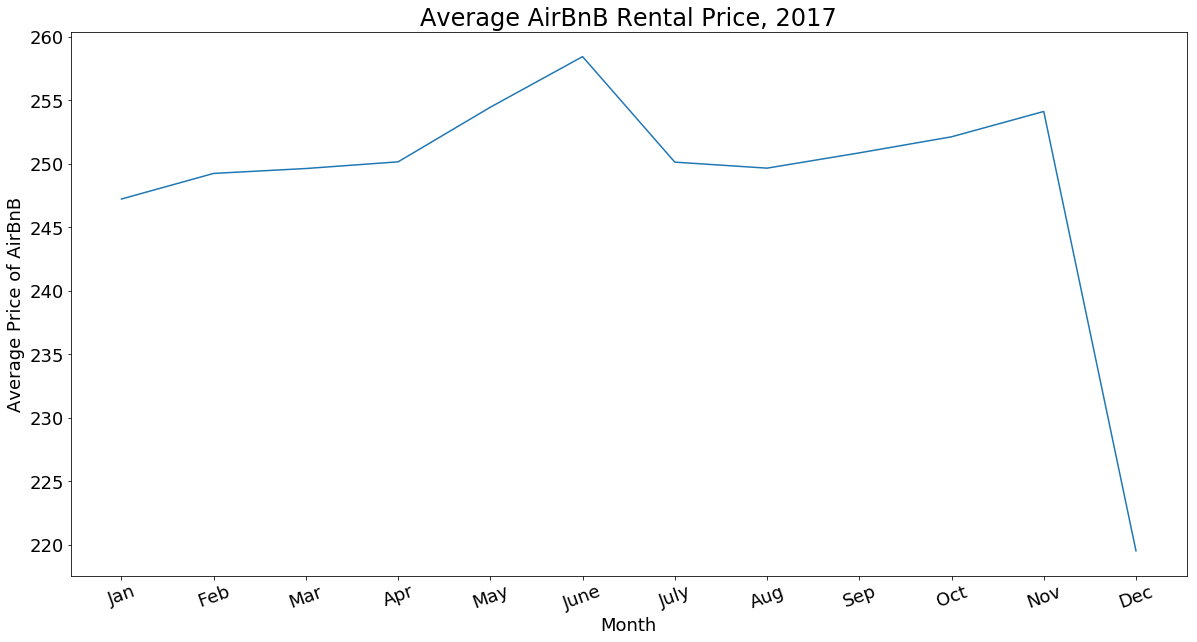

In [47]:
plt.figure(figsize=(20,10))
plt.plot(averagePrices)
plt.rcParams.update({'font.size': 20})
plt.xticks(np.arange(12), labels = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation = 20)
plt.xlabel('Month')
plt.ylabel("Average Price of AirBnB")
plt.title("Average AirBnB Rental Price, 2017")

***Above, the plot shows the average NIGHTLY price for an airbnb throughout 2017***

Text(0.5, 1.0, 'Average AirBnB Monthly Rental Price, 2017')

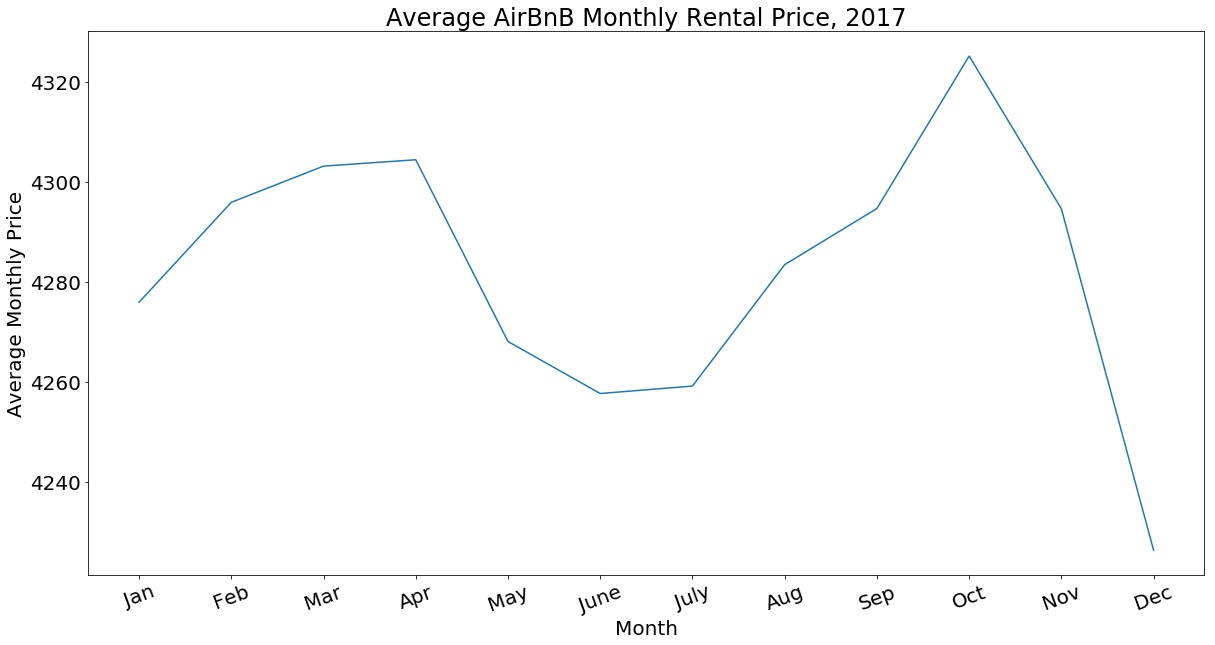

In [48]:
plt.figure(figsize=(20,10))
plt.plot(monthlyPrices)
plt.rcParams.update({'font.size': 20})
plt.xticks(np.arange(12), labels = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation = 20)
plt.xlabel('Month')
plt.ylabel("Average Monthly Price")
plt.title("Average AirBnB Monthly Rental Price, 2017")

***Above, the plot shows the average MONTHLY price for an Airbnb listing in 2017***

Text(0.5, 1.0, 'Average AirBnB Monthly Rental Price in the Financial District, 2017')

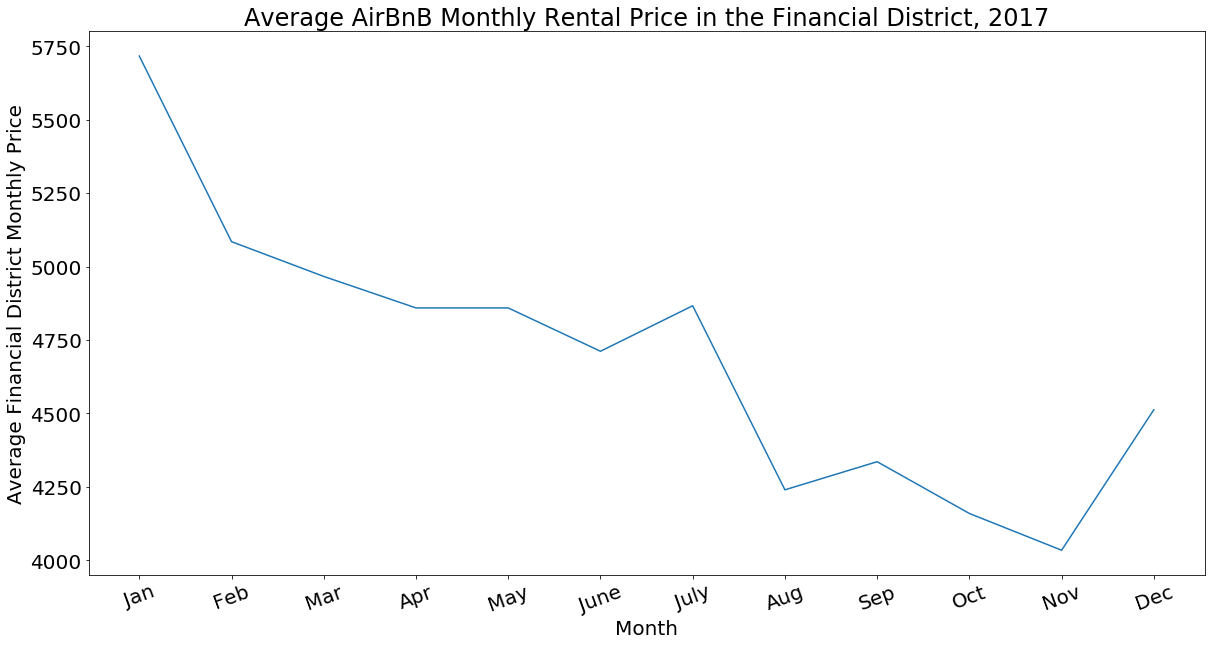

In [49]:
plt.figure(figsize=(20,10))
plt.plot(financialDistrictMonthlyPrices)
plt.rcParams.update({'font.size': 20})
plt.xticks(np.arange(12), labels = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation = 20)
plt.xlabel('Month')
plt.ylabel("Average Financial District Monthly Price")
plt.title("Average AirBnB Monthly Rental Price in the Financial District, 2017")

***Above, the plot shows the Average MONTHLY price for a listing in the FINANCIAL DISTRICT. The financial district is known to be where a lot of interns tend to stay over the summer***

***Below, I am revisiting the locations of Airbnb listings in the month of May 2019***

***The visualization below was created with lots of reference to https://www.datadependence.com/2016/06/creating-map-visualisations-in-python/***

In [50]:
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [51]:
latitudes = []
longitudes = []
prices = []
latKeys = data2019May['latitude'].keys()
lonKeys = data2019May['longitude'].keys()
for i in latKeys:
    latitudes.append(data2019May['latitude'][i])
    prices.append(data2019May['price'][i])
for i in lonKeys:    
    longitudes.append(data2019May['longitude'][i])
coordinates = pd.DataFrame(latitudes)
coordinates['longitudes'] = longitudes

***Above, I have created a dataframe with the latitude and longitude values contained in the full dataset***

In [52]:
coordinates.columns = ['lat', 'long']
coordinates['lat_long'] = coordinates[['lat', 'long']].apply(tuple, axis=1)
coordinates['price'] = prices

***Below, I have selected a few popular San Francisco tourist locations, and have found their coordinates using Google Maps***

In [53]:
touristLocations = ["Fisherman's Wharf","Chinatown", "Ghiradhelli Square", "Alamo Square", "Lombard Street", "Dolores Park"]
touristLocationsLatitudes = [37.8083, 37.7968, 37.8059, 37.7764, 37.8006, 37.759773]
touristLocationsLongitudes = [-122.416, -122.408, -122.423, -122.435, -122.43, -122.427063]
coordinates2 = pd.DataFrame(touristLocations)

coordinates2 = pd.DataFrame(touristLocations)
coordinates2['latitude'] = touristLocationsLatitudes
coordinates2['longitude'] = touristLocationsLongitudes
coordinates2.columns = ['Spot', 'lat', 'long']
coordinates2['lat_long'] = coordinates2[['lat', 'long']].apply(tuple, axis=1)

***Below, plotting the coordinates of each individual listing in SF, as well as the tourist locations***

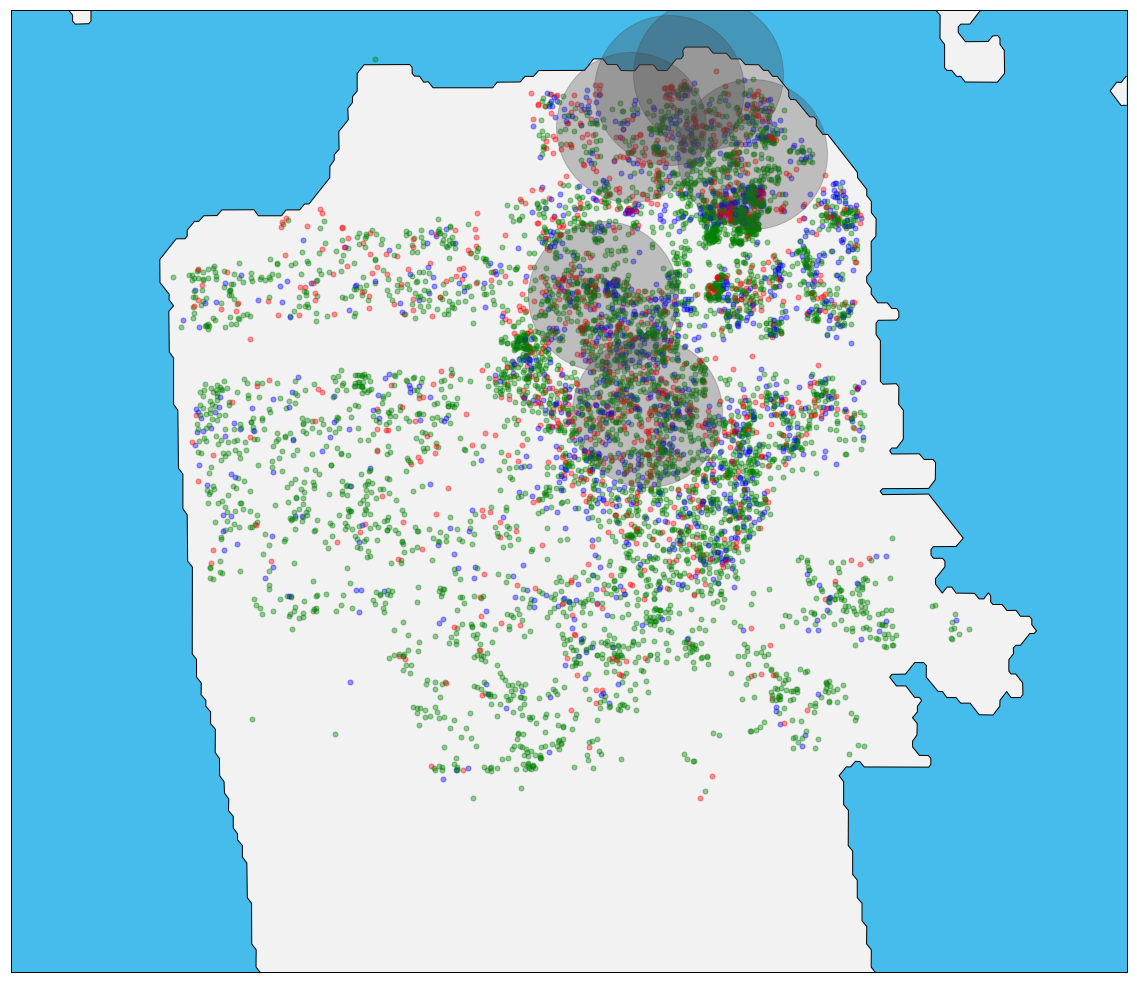

In [54]:
fig, ax = plt.subplots(figsize=(20,20))
m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-122.542546, llcrnrlat= 37.679248, urcrnrlon=-122.339906, urcrnrlat=37.817396)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
color = '#222222'
def plotIt(pos,theColor):
    x, y = m(pos[1], pos[0])
    size = 5
    m.plot(x, y, 'o', markersize=size, color=theColor, alpha=0.4)
for loc in range(len(coordinates)):
    if coordinates['price'][loc] > 300:
        color = "#FF0000"
    elif coordinates['price'][loc] > 200:
        color  = "#0000FF"
    else:
        color = "#008000"
    plotIt(coordinates['lat_long'][loc],color)
def plotIt(pos):
    x, y = m(pos[1], pos[0])
    size = 150
    m.plot(x, y, 'o', markersize=size, color='#444444', alpha=0.3)
coordinates2.lat_long.apply(plotIt)
plt.show()

***The above is a mapping of all the AirBnB listings for the month of May. Listings priced at greater than 300 dollars are colored RED, those greater than 200 dollars colored BLUE, and everything 200 and below GREEN. It seems like there are higher priced listings throughout the city, but there seem to be a bit more around the popular hubs (black circles). Some of these include Dolores Park and Fisherman's Wharf. It isn't too surprising that the listings are concentrated near these, considering AirBnB is also known to attract many tourists.***



***Below, I am now revisting the results of the linear regression earlier (pasted again above), where we found a negative coefficient of 3.4 dollars for the minimum nights on a listing. I want to see how convincing this slope is***

In [55]:
x = data2017Jan.dropna()
model = LinearRegression().fit(x[["minimum_nights"]],x[["monthly_price"]])
print(model.intercept_,model.coef_)

[4352.08056601] [[-2.58720216]]


In [56]:
def getLinearModel(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    sum_x_squared = np.sum((x - x_mean)**2)
    sum_y_squared = np.sum((y - y_mean)**2)
    sum_x_y = np.sum((x - x_mean) * (y - y_mean))
    slope = sum_x_y / sum_x_squared
    intercept = y_mean - x_mean * slope
    predictions = x * slope + intercept
    sum_squared_error = np.sum((y - predictions)**2)
    standard_error = np.sqrt(sum_squared_error / ((len(x) - 2) * sum_x_squared))
    return { "slope": slope, "intercept": intercept, "standard_error": standard_error }

***NOTE: The code above comes directly from Professor Mimno's lecture notes for March 28. The code below is also very similar to code from lecture, with only slight differences to make it work for my own data***

In [57]:
x = data2017Jan.dropna()
getLinearModel(x['minimum_nights'],x['monthly_price'])

{'slope': -2.5872021562524714,
 'intercept': 4352.080566006499,
 'standard_error': 4.035181592126017}

***These are the same results as those given by LinearRegression().***

In [58]:
def predict(x, model):
    return x * model["slope"] + model["intercept"]

In [59]:
calculatedX = x['minimum_nights']
calculatedY = x['monthly_price']
model = getLinearModel(calculatedX, calculatedY)
calculatedXExtent = np.array([calculatedX.min(), calculatedX.max()])

***Above, I use the same values for minimum nights and monthly price that were used to perform the regression earlier.***

In [60]:
def permute(y):
    permutatedY = y.copy()
    np.random.shuffle(permutatedY)
    return permutatedY

In [61]:
permutatedSlopes = np.zeros(1000)
steeperSlopes = 0
for i in range(1000):
    permutatedY = permute(np.array(calculatedY))
    permutatedModel = getLinearModel(calculatedX, permutatedY)   
    if np.abs(permutatedModel["slope"]) > np.abs(model["slope"]):
        steeperSlopes += 1
    
    permutatedSlopes[i] = permutatedModel["slope"] / permutatedModel["standard_error"]
print((steeperSlopes / 2) / 1000, 1 - t.cdf(np.abs(model["slope"]) / model["standard_error"], df=1747))

0.23 0.2607510049623588


***From the test, it appears that only around 26.07% of slopes calculated though permutations were higher than that calculated by the regression. However, ideally this value should be about 50%. That being said, the coefficient given by the regression is not very convincing. The problem is likely in the fact that the values for AirBnB listings's minimum nights are not very continuous.***